# 1.数据导入查看与初步处理

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


## 1.1导入数据

In [2]:
train = pd.read_csv("Data/train.csv", nrows=2000000) 

test = pd.read_csv("Data/test.csv") 

## 1.2查看数据

In [177]:
print(train.shape)
print(test.shape)

(2000000, 8)
(9914, 7)


In [178]:
train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [179]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 8 columns):
key                  object
fare_amount          float64
pickup_datetime      object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      int64
dtypes: float64(5), int64(1), object(2)
memory usage: 122.1+ MB


In [180]:
test.head()

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


In [181]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 7 columns):
key                  9914 non-null object
pickup_datetime      9914 non-null object
pickup_longitude     9914 non-null float64
pickup_latitude      9914 non-null float64
dropoff_longitude    9914 non-null float64
dropoff_latitude     9914 non-null float64
passenger_count      9914 non-null int64
dtypes: float64(4), int64(1), object(2)
memory usage: 542.3+ KB


## 1.3数据集描述

In [182]:
train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+06,2.000000e+06,2.000000e+06,1.999986e+06,1.999986e+06,2.000000e+06
mean,1.134779e+01,-7.252321e+01,3.992963e+01,-7.252395e+01,3.992808e+01,1.684113e+00
std,9.852883e+00,1.286804e+01,7.983352e+00,1.277497e+01,1.032382e+01,1.314982e+00
min,-6.200000e+01,-3.377681e+03,-3.458665e+03,-3.383297e+03,-3.461541e+03,0.000000e+00
25%,6.000000e+00,-7.399208e+01,4.073491e+01,-7.399141e+01,4.073400e+01,1.000000e+00
50%,8.500000e+00,-7.398181e+01,4.075263e+01,-7.398016e+01,4.075312e+01,1.000000e+00
75%,1.250000e+01,-7.396713e+01,4.076710e+01,-7.396369e+01,4.076809e+01,2.000000e+00
max,1.273310e+03,2.856442e+03,2.621628e+03,3.414307e+03,3.345917e+03,2.080000e+02


In [183]:
test.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273
std,0.042774,0.033541,0.039072,0.035435,1.278747
min,-74.252193,40.573143,-74.263242,40.568973,1.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000
max,-72.986532,41.709555,-72.990963,41.696683,6.000000


## 1.4初步处理

In [184]:
for dataset in [train, test]:#处理数据类型
    dataset['key'] = pd.to_datetime(dataset['key']) 
    dataset['pickup_datetime'] = pd.to_datetime(dataset['pickup_datetime'])

In [185]:
for dataset in [train, test]:
    dataset['year'] = dataset['pickup_datetime'].dt.year
    dataset['month'] = dataset['pickup_datetime'].dt.month
    dataset['day'] = dataset['pickup_datetime'].dt.day
    dataset['weekday'] = dataset['pickup_datetime'].dt.weekday
    dataset['hour'] = dataset['pickup_datetime'].dt.hour

In [187]:
print(train.shape)
print(test.shape)

(2000000, 13)
(9914, 12)


In [188]:
train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,weekday,hour
0,2009-06-15 17:26:21.000000100,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,15,0,17
1,2010-01-05 16:52:16.000000200,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,5,1,16
2,2011-08-18 00:35:00.000000490,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,18,3,0
3,2012-04-21 04:30:42.000000100,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,21,5,4
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,9,1,7


In [189]:
test.head()

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,weekday,hour
0,2015-01-27 13:08:24.000000200,2015-01-27 13:08:24+00:00,-73.973320,40.763805,-73.981430,40.743835,1,2015,1,27,1,13
1,2015-01-27 13:08:24.000000300,2015-01-27 13:08:24+00:00,-73.986862,40.719383,-73.998886,40.739201,1,2015,1,27,1,13
2,2011-10-08 11:53:44.000000200,2011-10-08 11:53:44+00:00,-73.982524,40.751260,-73.979654,40.746139,1,2011,10,8,5,11
3,2012-12-01 21:12:12.000000200,2012-12-01 21:12:12+00:00,-73.981160,40.767807,-73.990448,40.751635,1,2012,12,1,5,21
4,2012-12-01 21:12:12.000000300,2012-12-01 21:12:12+00:00,-73.966046,40.789775,-73.988565,40.744427,1,2012,12,1,5,21


# 2.数据探索性分析

## 1.1缺失值

In [190]:
train.isnull().sum().sort_values(ascending=False)

dropoff_latitude     14
dropoff_longitude    14
hour                  0
weekday               0
day                   0
month                 0
year                  0
passenger_count       0
pickup_latitude       0
pickup_longitude      0
pickup_datetime       0
fare_amount           0
key                   0
dtype: int64

In [191]:
train.drop(train[train.isnull().any(1)].index, axis=0, inplace=True)
#删减缺失行

In [192]:
train.shape

(1999986, 13)

## 1.2异常值

### 1.2.1车费应为正值

In [193]:
train['fare_amount'].describe()

count    1.999986e+06
mean     1.134768e+01
std      9.852609e+00
min     -6.200000e+01
25%      6.000000e+00
50%      8.500000e+00
75%      1.250000e+01
max      1.273310e+03
Name: fare_amount, dtype: float64

In [194]:
from collections import Counter
Counter(train['fare_amount']<0)#计算负值个数

Counter({False: 1999909, True: 77})

In [195]:
train = train[train.fare_amount>=0]#删除负值行

In [196]:
train.shape

(1999909, 13)

Text(0, 0.5, 'Frequency')

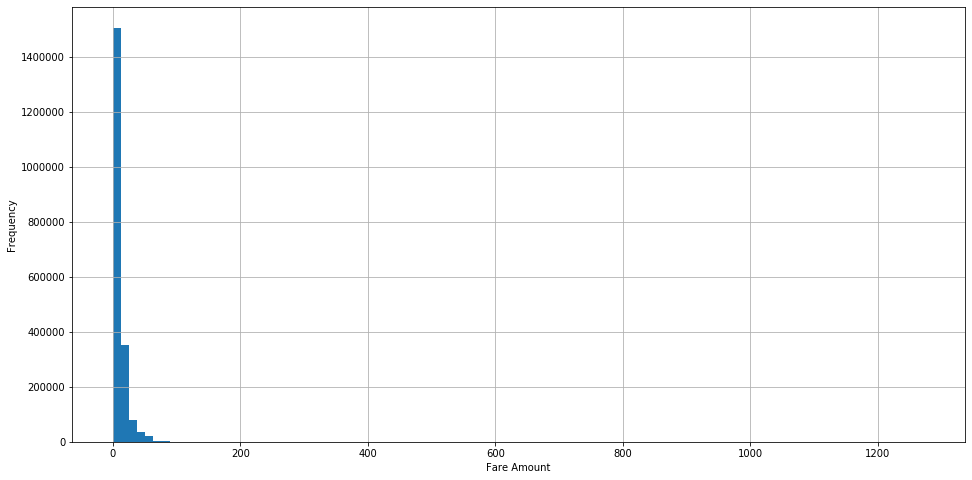

In [197]:
#可视化分布
train.fare_amount.hist(bins=100,figsize = (16,8))
plt.xlabel("Fare Amount")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

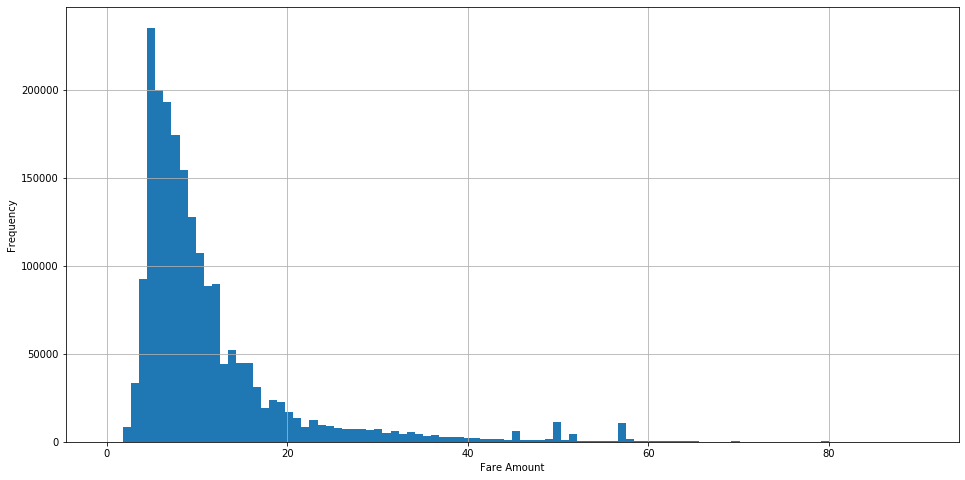

In [198]:
#由图细分放大观察1
train[train.fare_amount < 90].fare_amount.hist(bins=100, figsize = (16,8))
plt.xlabel("Fare Amount")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

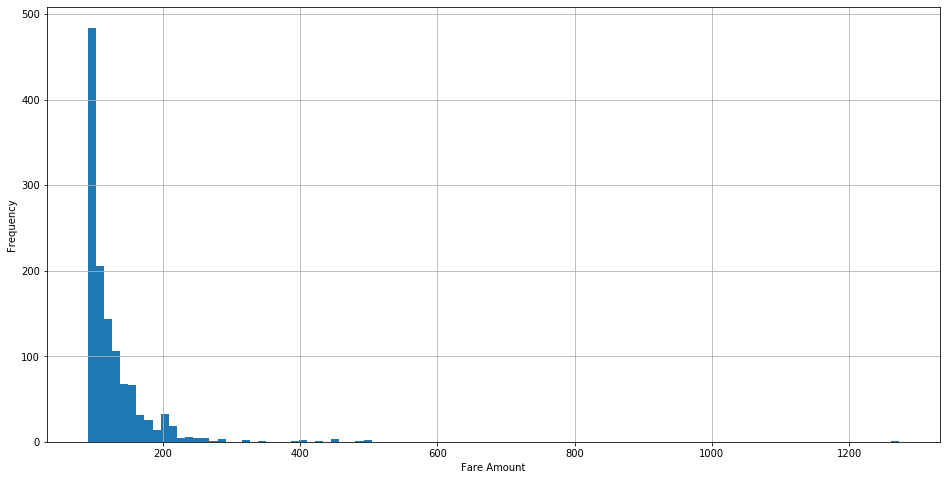

In [199]:
#由图细分放大观察2
train[train.fare_amount >= 90].fare_amount.hist(bins=100, figsize = (16,8))
plt.xlabel("Fare Amount")
plt.ylabel("Frequency")

In [200]:
print(train[train.fare_amount < 90].shape)
print(train[train.fare_amount >= 90].shape)

(1998677, 13)
(1232, 13)


### 1.2.2经度纬度范围应正常

In [201]:
#上车纬度（-90至90）
train['pickup_latitude'].describe()

count    1.999909e+06
mean     3.992968e+01
std      7.983332e+00
min     -3.458665e+03
25%      4.073491e+01
50%      4.075263e+01
75%      4.076710e+01
max      2.621628e+03
Name: pickup_latitude, dtype: float64

In [202]:
from collections import Counter
print(Counter(train['pickup_latitude'] < -90))
print(Counter(train['pickup_latitude'] > 90))

Counter({False: 1999901, True: 8})
Counter({False: 1999884, True: 25})


In [203]:
print(train[train['pickup_latitude']<-90])
print(train[train['pickup_latitude']>90])

                                  key  fare_amount           pickup_datetime  \
150559  2012-08-03 07:43:00.000000176         25.3 2012-08-03 07:43:00+00:00   
436233  2012-03-11 01:56:00.000000100          4.1 2012-03-11 01:56:00+00:00   
543001  2011-10-28 13:53:00.000000178          5.3 2011-10-28 13:53:00+00:00   
1281413 2011-09-02 22:51:00.000000213         11.3 2011-09-02 22:51:00+00:00   
1340837 2011-06-09 10:39:00.000000137         10.1 2011-06-09 10:39:00+00:00   
1388984 2012-01-18 21:33:00.000000680         11.3 2012-01-18 21:33:00+00:00   
1606685 2011-07-05 17:10:00.000000630          4.9 2011-07-05 17:10:00+00:00   
1781778 2011-10-13 07:10:00.000000140          6.5 2011-10-13 07:10:00+00:00   

         pickup_longitude  pickup_latitude  dropoff_longitude  \
150559           0.000000     -3116.285383         -73.953600   
436233       -2986.242495      -880.627428       -3383.296608   
543001       -3377.680935      -113.019497        -554.918693   
1281413      -2256.

In [204]:
#删除错误值
train.drop(train[(train['pickup_latitude']<-90) | (train['pickup_latitude']>90)].index, axis=0, inplace=True)

In [205]:
train.shape

(1999876, 13)

In [206]:
#上车点经度（-180至180）
train['pickup_longitude'].describe()

count    1.999876e+06
mean    -7.252015e+01
std      1.096722e+01
min     -2.320853e+03
25%     -7.399208e+01
50%     -7.398181e+01
75%     -7.396713e+01
max      2.814476e+03
Name: pickup_longitude, dtype: float64

In [207]:
from collections import Counter
print(Counter(train['pickup_longitude']<-180))
print(Counter(train['pickup_longitude']>180))

Counter({False: 1999856, True: 20})
Counter({False: 1999875, True: 1})


In [208]:
print(train[train['pickup_longitude']<-180])
print(train[train['pickup_longitude']>180])

                                  key  fare_amount           pickup_datetime  \
60442   2012-01-12 13:36:00.000000186         4.90 2012-01-12 13:36:00+00:00   
217355  2012-06-03 23:21:00.000000770         6.10 2012-06-03 23:21:00+00:00   
243342  2012-08-02 10:38:00.000000111         7.30 2012-08-02 10:38:00+00:00   
351119  2012-02-03 07:53:00.000000135         4.10 2012-02-03 07:53:00+00:00   
370663  2012-05-04 23:19:00.000000261         6.10 2012-05-04 23:19:00+00:00   
416859  2012-07-21 15:23:00.000000930         6.50 2012-07-21 15:23:00+00:00   
568830  2013-05-23 15:23:00.000000700        11.50 2013-05-23 15:23:00+00:00   
675500  2011-10-28 10:53:00.000000800        16.90 2011-10-28 10:53:00+00:00   
837619  2012-07-17 08:38:00.000000116        39.70 2012-07-17 08:38:00+00:00   
914435  2012-03-04 00:10:00.000000131        11.70 2012-03-04 00:10:00+00:00   
921758  2012-05-21 10:57:00.000000840        10.10 2012-05-21 10:57:00+00:00   
1043169 2013-03-15 11:11:00.000000190   

In [209]:
#删除错误值
train.drop(train[(train['pickup_longitude']<-180) | (train['pickup_longitude']>180)].index, axis=0, inplace=True)

In [210]:
train.shape

(1999855, 13)

In [211]:
#下车点纬度（-90至90）
train['dropoff_latitude'].describe()

count    1.999855e+06
mean     3.992628e+01
std      7.616626e+00
min     -3.114339e+03
25%      4.073400e+01
50%      4.075312e+01
75%      4.076809e+01
max      3.210337e+03
Name: dropoff_latitude, dtype: float64

In [212]:
from collections import Counter
print(Counter(train['dropoff_latitude'] < -90))
print(Counter(train['dropoff_latitude'] > 90))

Counter({False: 1999851, True: 4})
Counter({False: 1999845, True: 10})


In [213]:
print(train[train['dropoff_latitude']<-90])
print(train[train['dropoff_latitude']>90])

                                  key  fare_amount           pickup_datetime  \
579901  2013-08-14 20:23:00.000000245         18.0 2013-08-14 20:23:00+00:00   
1254291 2012-04-18 11:08:00.000000210          6.1 2012-04-18 11:08:00+00:00   
1448456 2009-09-09 09:11:00.000000161          5.7 2009-09-09 09:11:00+00:00   
1512218 2010-08-12 19:33:03.000000400          7.7 2010-08-12 19:33:03+00:00   

         pickup_longitude  pickup_latitude  dropoff_longitude  \
579901         -73.999190        40.720200          -0.360000   
1254291        -74.000640        40.728432           0.000000   
1448456        -74.002892        40.728170           0.000000   
1512218        -73.999023        40.744502         -73.983568   

         dropoff_latitude  passenger_count  year  month  day  weekday  hour  
579901       -3114.338567                1  2013      8   14        2    20  
1254291      -2515.672033                1  2012      4   18        2    11  
1448456      -1353.533270              

In [214]:
#删除错误值
train.drop(train[(train['dropoff_latitude']<-90) | (train['dropoff_latitude']>90)].index, axis=0, inplace=True)

In [215]:
train.shape

(1999841, 13)

In [216]:
#下车点经度（-180至180）
train['dropoff_longitude'].describe()

count    1.999841e+06
mean    -7.252249e+01
std      1.072011e+01
min     -2.125745e+03
25%     -7.399141e+01
50%     -7.398016e+01
75%     -7.396369e+01
max      4.558162e+01
Name: dropoff_longitude, dtype: float64

In [217]:
from collections import Counter
print(Counter(train['dropoff_longitude'] < -180))
print(Counter(train['dropoff_longitude'] > 180))

Counter({False: 1999824, True: 17})
Counter({False: 1999841})


In [218]:
print(train[train['dropoff_longitude']<-180])
print(train[train['dropoff_longitude']>180])

                                  key  fare_amount           pickup_datetime  \
269695  2012-05-24 09:00:00.000000101         17.7 2012-05-24 09:00:00+00:00   
282374  2011-04-25 13:09:00.000000123          5.7 2011-04-25 13:09:00+00:00   
449263  2012-01-28 16:51:00.000000880          6.9 2012-01-28 16:51:00+00:00   
472273  2012-02-09 17:42:00.000000250         49.8 2012-02-09 17:42:00+00:00   
666352  2012-03-16 22:02:00.000000257          4.9 2012-03-16 22:02:00+00:00   
757003  2012-04-29 20:45:00.000000211          3.3 2012-04-29 20:45:00+00:00   
858760  2012-06-19 07:41:00.000000190          6.1 2012-06-19 07:41:00+00:00   
907792  2012-02-18 00:22:00.000000100          8.1 2012-02-18 00:22:00+00:00   
967162  2012-02-09 17:42:00.000000178          5.7 2012-02-09 17:42:00+00:00   
1177891 2012-01-14 08:35:00.000000460         17.7 2012-01-14 08:35:00+00:00   
1268218 2012-07-30 15:54:00.000000490          8.1 2012-07-30 15:54:00+00:00   
1480417 2012-03-05 10:49:00.000000560   

In [219]:
#删除错误值
train.drop(train[(train['dropoff_longitude']<-180) | (train['dropoff_longitude']>180)].index, axis=0, inplace=True)

In [220]:
train.shape

(1999824, 13)

### 1.2.3乘客数量应正常

In [221]:
train['passenger_count'].describe()

count    1.999824e+06
mean     1.684118e+00
std      1.314961e+00
min      0.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      2.080000e+02
Name: passenger_count, dtype: float64

Text(0, 0.5, 'Frequency')

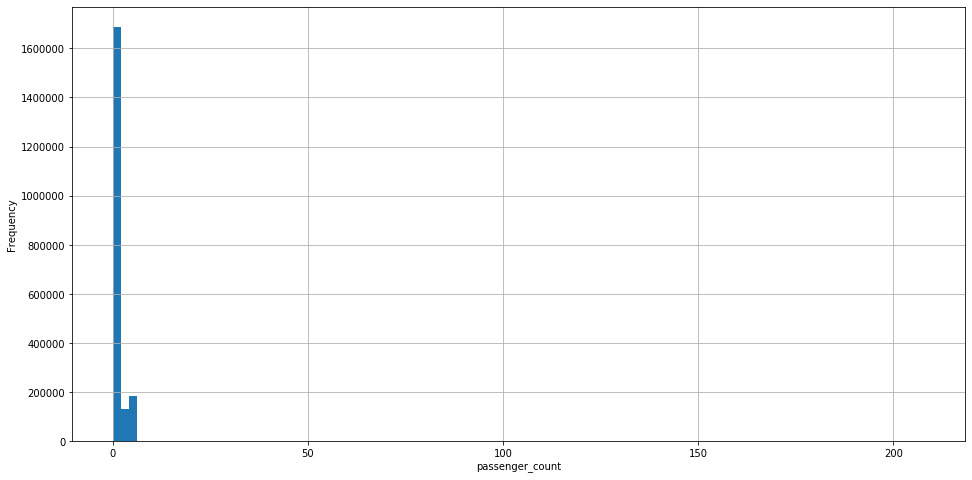

In [222]:
#可视化分布
train.passenger_count.hist(bins=100,figsize = (16,8))
plt.xlabel("passenger_count")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

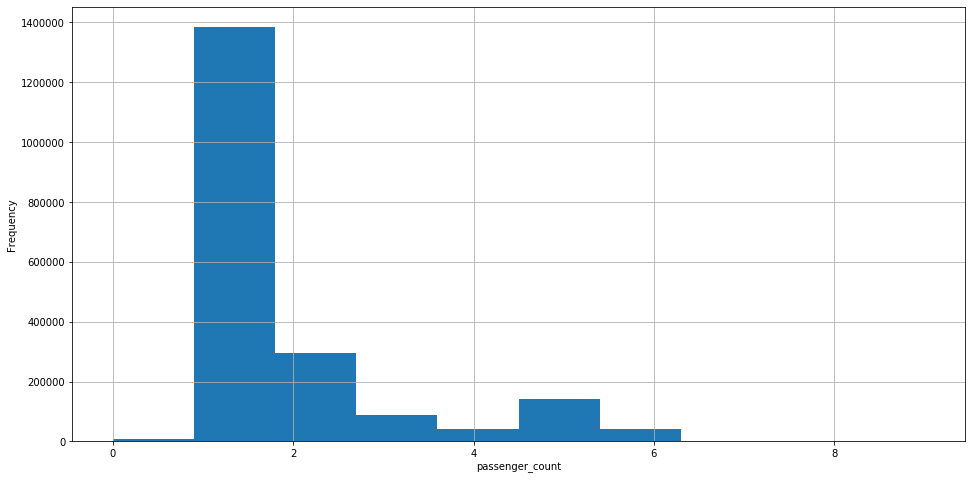

In [223]:
#放大观察
train[train.passenger_count<10].passenger_count.hist(bins=10,figsize = (16,8))
plt.xlabel("passenger_count")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

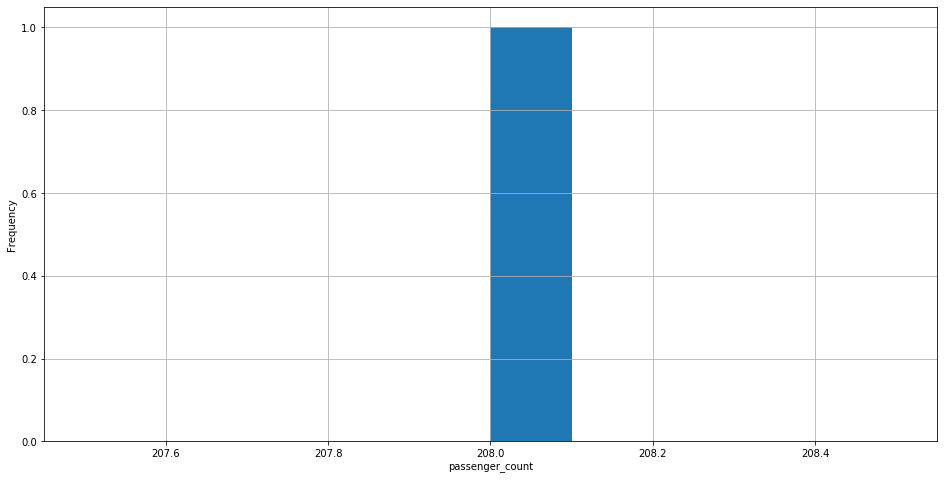

In [224]:
train[train.passenger_count >= 10].passenger_count.hist(bins=10,figsize = (16,8))
plt.xlabel("passenger_count")
plt.ylabel("Frequency")

In [225]:
train[train.passenger_count >10].shape

(1, 13)

In [226]:
train[train.passenger_count >10]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,weekday,hour
929022,2009-07-30 11:54:00.000000193,3.3,2009-07-30 11:54:00+00:00,0.0,0.0,0.0,0.0,208,2009,7,30,3,11


In [227]:
#删除离异值
train.drop(train[train['passenger_count']>6].index, axis=0, inplace=True)

In [228]:
train.shape

(1999822, 13)

In [229]:
#乘客为0的记录
train[train.passenger_count ==0].shape

(7109, 13)

### 1.2.4相关性分析(略)

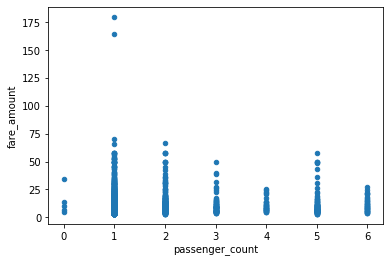

In [230]:
plot = train.iloc[:2000].plot.scatter('passenger_count', 'fare_amount')

## 1.3数据处理计算

### 1.3.1框定范围（类似欠抽样）

In [231]:
#确定测试集范围
print("纬度最小值：",
      min(test.pickup_latitude.min(), test.dropoff_latitude.min()))
print("纬度最大值：",
     max(test.pickup_latitude.max(), test.dropoff_latitude.max()))
print("经度最小值：",
     min(test.pickup_longitude.min(), test.dropoff_longitude.min()))
print("经度最大值：",
     max(test.pickup_longitude.max(), test.dropoff_longitude.max()))

纬度最小值： 40.568973
纬度最大值： 41.709555
经度最小值： -74.263242
经度最大值： -72.986532


In [232]:
#选取经度-74.263242至-72.986532，纬度40.568973至41.709555
#范围内记录作为训练集
def select_within_boundingbox(df, BB):
    return (df.pickup_longitude >= BB[0]) & (df.pickup_longitude <= BB[1]) & \
           (df.pickup_latitude >= BB[2]) & (df.pickup_latitude <= BB[3]) & \
           (df.dropoff_longitude >= BB[0]) & (df.dropoff_longitude <= BB[1]) & \
           (df.dropoff_latitude >= BB[2]) & (df.dropoff_latitude <= BB[3])
BB = (-74.5, -72.8, 40.5, 41.8)
train = train[select_within_boundingbox(train, BB)]

In [233]:
train.shape

(1957917, 13)

### 1.3.2计算上下车地点间距离

In [234]:
#半正矢公式（Haversine Equation）计算两经纬度点间距离
#地球平均半径=6371KM
def distance(lat1, long1, lat2, long2):
    data = [train, test]
    for i in data:
        R = 6371  # 地球半径（单位：千米）
        phi1 = np.radians(i[lat1])
        phi2 = np.radians(i[lat2])

        delta_phi = np.radians(i[lat2] - i[lat1])
        delta_lambda = np.radians(i[long2] - i[long1])

        # a = sin²((φB - φA)/2) + cos φA . cos φB . sin²((λB - λA)/2)
        a = np.sin(delta_phi / 2.0) ** 2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2.0) ** 2

        # c = 2 * atan2( √a, √(1−a) )
        c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

        # d = R*c
        d = (R * c)  # 单位：千米
        i['H_Distance'] = d
    return d

distance('pickup_latitude','pickup_longitude','dropoff_latitude','dropoff_longitude')

0        2.323260
1        2.425353
2        0.618628
3        1.961033
4        5.387301
          ...    
9909     2.124874
9910     3.270969
9911    19.183941
9912     8.343486
9913     1.180825
Length: 9914, dtype: float64

In [235]:
print(train.shape)
print(test.shape)

(1957917, 14)
(9914, 13)


In [236]:
train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,weekday,hour,H_Distance
0,2009-06-15 17:26:21.000000100,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,15,0,17,1.030764
1,2010-01-05 16:52:16.000000200,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,5,1,16,8.450134
2,2011-08-18 00:35:00.000000490,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,18,3,0,1.389525
3,2012-04-21 04:30:42.000000100,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,21,5,4,2.799270
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,9,1,7,1.999157


In [237]:
test.head()

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,weekday,hour,H_Distance
0,2015-01-27 13:08:24.000000200,2015-01-27 13:08:24+00:00,-73.973320,40.763805,-73.981430,40.743835,1,2015,1,27,1,13,2.323260
1,2015-01-27 13:08:24.000000300,2015-01-27 13:08:24+00:00,-73.986862,40.719383,-73.998886,40.739201,1,2015,1,27,1,13,2.425353
2,2011-10-08 11:53:44.000000200,2011-10-08 11:53:44+00:00,-73.982524,40.751260,-73.979654,40.746139,1,2011,10,8,5,11,0.618628
3,2012-12-01 21:12:12.000000200,2012-12-01 21:12:12+00:00,-73.981160,40.767807,-73.990448,40.751635,1,2012,12,1,5,21,1.961033
4,2012-12-01 21:12:12.000000300,2012-12-01 21:12:12+00:00,-73.966046,40.789775,-73.988565,40.744427,1,2012,12,1,5,21,5.387301


In [238]:
#车费与距离均为0的无用数据
train[(train['H_Distance']==0)&(train['fare_amount']==0)]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,weekday,hour,H_Distance
331597,2013-08-05 06:45:54.000000500,0.0,2013-08-05 06:45:54+00:00,-73.982354,40.679971,-73.982354,40.679971,1,2013,8,5,0,6,0.0
436658,2015-03-04 22:33:39.000000800,0.0,2015-03-04 22:33:39+00:00,-74.043442,40.788208,-74.043442,40.788208,1,2015,3,4,2,22,0.0
689250,2015-05-27 23:10:03.000000400,0.0,2015-05-27 23:10:03+00:00,-73.994125,40.741131,-73.994125,40.741131,1,2015,5,27,2,23,0.0
1662545,2010-03-13 02:39:29.000000100,0.0,2010-03-13 02:39:29+00:00,-74.035278,40.738683,-74.035278,40.738683,2,2010,3,13,5,2,0.0


In [239]:
#删除车费与距离均为0的无用数据
train = train.drop(index= train[(train['H_Distance']==0)&(train['fare_amount']==0)].index, axis=0)

In [240]:
print(train.shape)

(1957913, 14)


# 3.数据建模

## 3.1处理后数据

In [241]:
train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,weekday,hour,H_Distance
0,2009-06-15 17:26:21.000000100,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,15,0,17,1.030764
1,2010-01-05 16:52:16.000000200,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,5,1,16,8.450134
2,2011-08-18 00:35:00.000000490,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,18,3,0,1.389525
3,2012-04-21 04:30:42.000000100,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,21,5,4,2.799270
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,9,1,7,1.999157


In [242]:
test.head()

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,weekday,hour,H_Distance
0,2015-01-27 13:08:24.000000200,2015-01-27 13:08:24+00:00,-73.973320,40.763805,-73.981430,40.743835,1,2015,1,27,1,13,2.323260
1,2015-01-27 13:08:24.000000300,2015-01-27 13:08:24+00:00,-73.986862,40.719383,-73.998886,40.739201,1,2015,1,27,1,13,2.425353
2,2011-10-08 11:53:44.000000200,2011-10-08 11:53:44+00:00,-73.982524,40.751260,-73.979654,40.746139,1,2011,10,8,5,11,0.618628
3,2012-12-01 21:12:12.000000200,2012-12-01 21:12:12+00:00,-73.981160,40.767807,-73.990448,40.751635,1,2012,12,1,5,21,1.961033
4,2012-12-01 21:12:12.000000300,2012-12-01 21:12:12+00:00,-73.966046,40.789775,-73.988565,40.744427,1,2012,12,1,5,21,5.387301


In [243]:
train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,weekday,hour,H_Distance
count,1.957913e+06,1.957913e+06,1.957913e+06,1.957913e+06,1.957913e+06,1.957913e+06,1.957913e+06,1.957913e+06,1.957913e+06,1.957913e+06,1.957913e+06,1.957913e+06
mean,1.132926e+01,-7.397514e+01,4.075107e+01,-7.397426e+01,4.075142e+01,1.684242e+00,2.011737e+03,6.269439e+00,1.570585e+01,3.041280e+00,1.350846e+01,3.328704e+00
std,9.713679e+00,3.858101e-02,2.958854e-02,3.776649e-02,3.275624e-02,1.306700e+00,1.863395e+00,3.437976e+00,8.682187e+00,1.949914e+00,6.514015e+00,3.777494e+00
min,0.000000e+00,-7.448963e+01,4.050005e+01,-7.449105e+01,4.050005e+01,0.000000e+00,2.009000e+03,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.000000e+00,-7.399229e+01,4.073654e+01,-7.399160e+01,4.073553e+01,1.000000e+00,2.010000e+03,3.000000e+00,8.000000e+00,1.000000e+00,9.000000e+00,1.253438e+00
50%,8.500000e+00,-7.398210e+01,4.075334e+01,-7.398062e+01,4.075383e+01,1.000000e+00,2.012000e+03,6.000000e+00,1.600000e+01,3.000000e+00,1.400000e+01,2.151907e+00
75%,1.250000e+01,-7.396834e+01,4.076752e+01,-7.396536e+01,4.076839e+01,2.000000e+00,2.013000e+03,9.000000e+00,2.300000e+01,5.000000e+00,1.900000e+01,3.913830e+00
max,5.000000e+02,-7.281783e+01,4.169685e+01,-7.281783e+01,4.171463e+01,6.000000e+00,2.015000e+03,1.200000e+01,3.100000e+01,6.000000e+00,2.300000e+01,1.147885e+02


In [246]:
test.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,weekday,hour,H_Distance
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273,2011.815816,6.857979,16.194170,2.852834,13.467420,3.435371
std,0.042774,0.033541,0.039072,0.035435,1.278747,1.803347,3.353272,8.838482,1.994451,6.868584,3.972374
min,-74.252193,40.573143,-74.263242,40.568973,1.000000,2009.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000,2010.000000,4.000000,9.000000,1.000000,8.000000,1.298277
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000,2012.000000,7.000000,16.000000,3.000000,15.000000,2.217412
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000,2014.000000,10.000000,25.000000,5.000000,19.000000,4.045302
max,-72.986532,41.709555,-72.990963,41.696683,6.000000,2015.000000,12.000000,31.000000,6.000000,23.000000,99.996040


In [247]:
train.dtypes

key                       datetime64[ns]
fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
year                               int64
month                              int64
day                                int64
weekday                            int64
hour                               int64
H_Distance                       float64
dtype: object

In [249]:
test.dtypes

key                       datetime64[ns]
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
year                               int64
month                              int64
day                                int64
weekday                            int64
hour                               int64
H_Distance                       float64
dtype: object

## 3.2建模

In [250]:
#构建训练集输入矩阵
def get_input_matrix(df):
    return np.column_stack((df.H_Distance, df.weekday+1, df.passenger_count, np.ones(len(df))))

train_X = get_input_matrix(train)
train_y = np.array(train['fare_amount'])

print(train_X.shape)
print(train_y.shape)

(1957913, 4)
(1957913,)


In [251]:
#最小二乘函数
(w, _, _, _) = np.linalg.lstsq(train_X, train_y, rcond = None)
print(w)

[ 2.09967727 -0.0482673   0.04397827  4.46104772]


In [252]:
#测试集
test.dtypes

key                       datetime64[ns]
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
year                               int64
month                              int64
day                                int64
weekday                            int64
hour                               int64
H_Distance                       float64
dtype: object

In [254]:
#生成测试集矩阵
test_X = get_input_matrix(test)
#计算预测值
test_y_predictions = np.matmul(test_X, w).round(decimals = 2)

In [255]:
#输出结果
submission = pd.DataFrame(
    {'key': test.key, 'fare_amount': test_y_predictions},
    columns = ['key', 'fare_amount'])
submission.to_csv("Data/submission.csv", index = False)

In [260]:
submission

,key,fare_amount
0,2015-01-27 13:08:24.000000200,9.29
1,2015-01-27 13:08:24.000000300,9.50
2,2011-10-08 11:53:44.000000200,5.51
3,2012-12-01 21:12:12.000000200,8.33
4,2012-12-01 21:12:12.000000300,15.53
...,...,...
9909,2015-05-10 12:37:51.000000200,8.85
9910,2015-01-12 17:05:51.000000100,11.54
9911,2015-04-19 20:44:15.000000100,44.67
9912,2015-01-31 01:05:19.000000500,21.95


In [259]:
import os
print(os.listdir('Data'))

['GCP-Coupons-Instructions.rtf', 'sample_submission.csv', 'submission.csv', 'test.csv', 'train.csv']
